In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import plotly.graph_objects as go

# Can We Predict Student Success?

## Introduction

In this project, we developed a machine learning model to predict the **Performance Index** of students based on various academic and lifestyle factors.
Understanding what influences student performance can provide valuable insights for improving study habits, planning educational programs, and supporting students in achieving better outcomes.

We used features such as hours studied, previous scores, extracurricular activities, sleep hours, and the number of practiced question papers.
A linear regression model with polynomial features was applied to analyze the relationship between these variables and the overall performance index.


The model was evaluated using metrics such as Mean Squared Error (MSE) and R² score to measure accuracy and reliability.

In [2]:
# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
print("Path to dataset files:", path)

Path to dataset files: /Users/veljkospasic/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [3]:
df = pd.read_csv('/Users/veljkospasic/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv')

In [4]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# EDA - Data Exploration

Exploring data type's, rows ....

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


Looking for missing values in dataset

In [6]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df.duplicated().any()

np.True_

⚠️ Even if it says that there are duplicates, its proven from valid source there are no duplicates in data set!

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df

In [9]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'No': 0, 'Yes': 1})

For "Extracurricular Activities", we converted **Yes** into int(**1**) and **No** into int(**0**)

<Axes: title={'center': 'Distribution of Students in Extracurricular Activities'}>

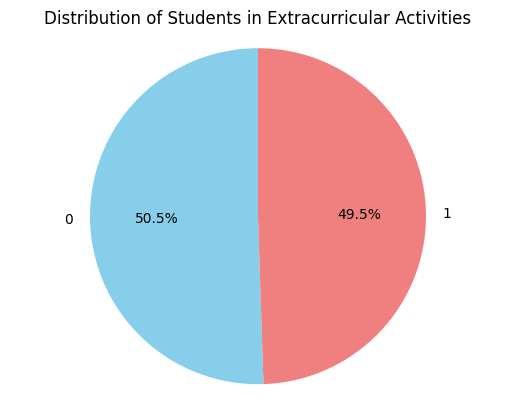

In [10]:
EA = df['Extracurricular Activities'].value_counts()


plt.pie(EA, labels=EA.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Students in Extracurricular Activities')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca()

We can see that **50.5%** students don't participate in extracurricular activities.

<Axes: xlabel='Sleep hours', ylabel='Number of students'>

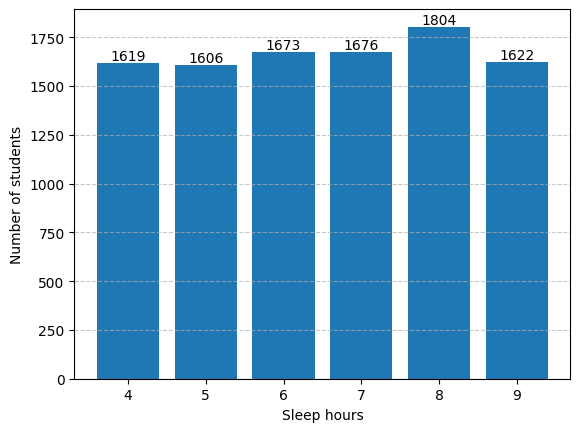

In [11]:
sleep_hours_distribution = df["Sleep Hours"].value_counts().sort_index()
bars = plt.bar(sleep_hours_distribution.index, sleep_hours_distribution.values)
plt.xlabel('Sleep hours')
plt.ylabel('Number of students')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.gca()

In [12]:
average_sleep_hours = df["Sleep Hours"].mean()
average_sleep_hours

np.float64(6.5306)

Here we can see that most students sleep **8 hours**, while avrage sleep of students is **6.53 hours**

<Axes: title={'center': 'Heatmap of Correlation Matrix'}, xlabel='Features', ylabel='Features'>

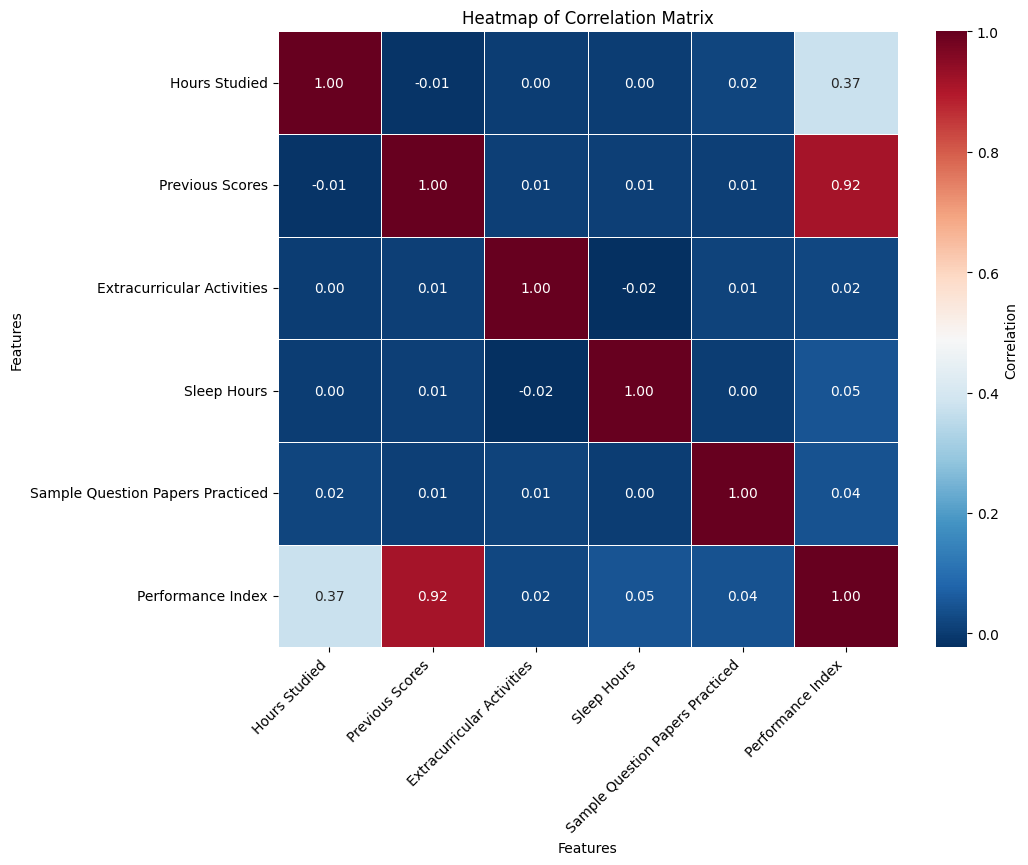

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="RdBu_r",
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title("Heatmap of Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.gca()

We can see that there is a bonds between **Performance Index** and other **Features**, for example there is a great bond between **Hours Studied** and **Performance Index** of **0.37**.

While strongest and our primary at this point is with **Previous Scores** that goes up to **0.92**

# Time to train Model - Linear Regression

We are going to implements next:

- Data preprocessing with Polynomial Transformation (degree = 2) - sklearn :(
- Linear Regression
- MSE as Loss Function
- Gradient descent

## 1. Chooseing features and Spliting data for model train-ing

Based on correlation matrix we saw that nearly every feature have inpact on Performance Index, with the main goal and stronges feature that is **Previous Scores**.

Next lets split our data into **train** and **test**, im gonna use sklearn to do that.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import kockice as k # - moj lib

Chooseing featues, the most important one is **Previous Scores** cuz we saw that he have the biggest correlation with **Performance **

In [15]:
feature_cols = df[["Hours Studied", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced", "Previous Scores"]]
target_col = df[["Performance Index"]]

In [16]:
X = feature_cols.to_numpy()  # (m, n_x)
Y = target_col.to_numpy()    # (m, 1)

Now spliting data into *train* and *test* !

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, Y_train.shape)
print("Test: ", X_test.shape,  Y_test.shape)

Train: (8000, 5) (8000, 1)
Test:  (2000, 5) (2000, 1)


## 2. Standardizeing data and Polynomial Features (Degree 2)

In this section we are going to Transponse matrix of Traing and Test, then we are going to standardize data with Standard Scaler.

Standard scaler forula is data - mean / standard_deviation

In [18]:
X_trainF = X_train.T   # (n_x, m_train)
Y_trainF = Y_train.T   # (1, m_train)

X_testF  = X_test.T    # (n_x, m_test)
Y_testF  = Y_test.T    # (1, m_test)

X_train_std, stats = k.standardize_rows(X_trainF)
mu, sd = stats
X_test_std = (X_testF - mu) / sd

print("X_train_std:", X_train_std.shape, "| X_test_std:", X_test_std.shape)

X_train_std: (5, 8000) | X_test_std: (5, 2000)


Here we check if standard scaler did good job

In [19]:
print("Means per feature (train):", X_train_std.mean(axis=1))  # ~0
print("Stds per feature (train):", X_train_std.std(axis=1))    # ~1
print("First 3 samples (train, standardized):\n", X_train_std[:, :3])

Means per feature (train): [ 2.53214116e-16 -1.04527498e-15  1.81937798e-16 -2.42993126e-16
 -3.55632190e-16]
Stds per feature (train): [1.         0.99999998 0.99999999 1.         1.        ]
First 3 samples (train, standardized):
 [[ 0.00645547 -1.14974744 -1.14974744]
 [-0.98930715  1.01080839 -0.98930715]
 [ 0.26988848  0.26988848  0.26988848]
 [ 0.13404112  0.48356164 -0.91452044]
 [-1.18384439 -1.2415057   0.66131759]]


We are gonna use PolynomialFeatures from sklearn, because i didn't build that feature it in kocka lib

In [20]:
# degree=2
poly2 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

X_train_poly = poly2.fit_transform(X_train_std.T).T   # (n_x', m_train)
X_test_poly  = poly2.transform(X_test_std.T).T        # (n_x', m_test)

print("X_train_poly:", X_train_poly.shape, "| X_test_poly:", X_test_poly.shape)

X_train_poly: (20, 8000) | X_test_poly: (20, 2000)


## 3. Model Training

For this this case im going to use my kockice lib that have building blocks for models.

So syntax is maybe confusing but im gonna explain it in easy way:

- **linear_init_params** (initializes parameters (weights and bias), seed represents random for reproducibility)
- **forward_linear** (typcal forward pass without activation func)
- **mse_loss** (simle MSE here im using "cost = np.sum(diff 2) / (2 * m)" insted of "cost = np.sum(diff 2) / m" because the factor 1/2 cancels out the 2 that appears when taking the derivative of the squared term during gradient computation. )
- **linear_backprop** ( basic backprop for forward pass without activation func)
- **gd.update** (basic gradient descent that update all params)

And here comes the training of a simple linear regg model

In [22]:
epochs = 800
lr = 0.03
use_half = True  #(1/m)

params = k.init_params(n_x=X_train_poly.shape[0], n_y=1)
history = []

for ep in range(epochs):
    Y_hat = k.forward_linear(X_train_poly, params)
    cost  = k.mse_loss(Y_hat, Y_trainF, use_half=use_half)
    grads = k.linear_backprop(X_train_poly, Y_trainF, Y_hat, use_half=use_half)
    params = k.gd_update(params, grads, lr=lr)
    history.append(cost)
    if (ep+1) % 20 == 0:
        print(f"[{ep+1:4d}] MSE(train) = {cost:.6f}")

print("Final train MSE:", history[-1])

[  20] MSE(train) = 165.192697
[  40] MSE(train) = 96.091230
[  60] MSE(train) = 64.481793
[  80] MSE(train) = 46.638400
[ 100] MSE(train) = 34.958862
[ 120] MSE(train) = 26.675331
[ 140] MSE(train) = 20.581073
[ 160] MSE(train) = 16.027843
[ 180] MSE(train) = 12.604607
[ 200] MSE(train) = 10.024465
[ 220] MSE(train) = 8.077825
[ 240] MSE(train) = 6.608555
[ 260] MSE(train) = 5.499414
[ 280] MSE(train) = 4.662078
[ 300] MSE(train) = 4.029922
[ 320] MSE(train) = 3.552665
[ 340] MSE(train) = 3.192348
[ 360] MSE(train) = 2.920320
[ 380] MSE(train) = 2.714945
[ 400] MSE(train) = 2.559892
[ 420] MSE(train) = 2.442832
[ 440] MSE(train) = 2.354454
[ 460] MSE(train) = 2.287731
[ 480] MSE(train) = 2.237357
[ 500] MSE(train) = 2.199326
[ 520] MSE(train) = 2.170614
[ 540] MSE(train) = 2.148937
[ 560] MSE(train) = 2.132571
[ 580] MSE(train) = 2.120215
[ 600] MSE(train) = 2.110887
[ 620] MSE(train) = 2.103845
[ 640] MSE(train) = 2.098528
[ 660] MSE(train) = 2.094513
[ 680] MSE(train) = 2.091483
[ 7

## Graphs MSE/Epochs and Typcal Linear Reggresion Graph

### MSE/Epochs

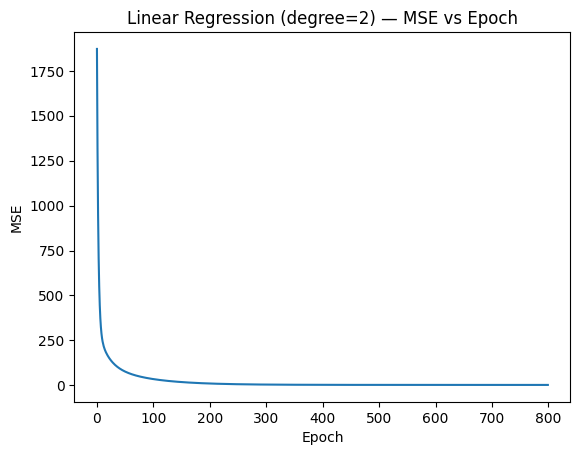

In [23]:
plt.plot(history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Linear Regression (degree=2) — MSE vs Epoch")
plt.show()

### Typcal Linear Reggresion Graph

This is ploty btw so u can use some tools like zoom, pan etc...

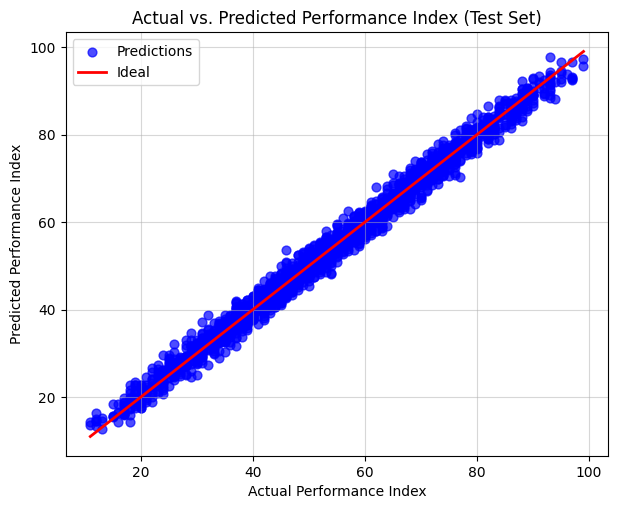

In [25]:
predict = k.forward_linear(X_test_poly, params)

y_true = Y_test.flatten()
y_pred = predict.flatten()

plt.figure(figsize=(7, 5.5))  # ~700x550 px

# scatter tačke
plt.scatter(y_true, y_pred, s=40, color="blue", alpha=0.7, label="Predictions")

# idealna linija (y = x)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color="red", linewidth=2, label="Ideal")

plt.title("Actual vs. Predicted Performance Index (Test Set)")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.legend()
plt.grid(alpha=0.5)

plt.show()

## Model Accuracy

In [26]:
predict_train = k.forward_linear(X_train_poly, params)

train_mse = np.mean(np.square(Y_trainF - predict_train))

ss_res = np.sum(np.square(Y_trainF - predict_train))
ss_tot = np.sum(np.square(Y_trainF - np.mean(Y_trainF)))
r_squared_train = 1 - (ss_res / ss_tot)
acc = r_squared_train * 100

print(f"Train MSE: {train_mse:.6f}")
print(f"Train R-squared: {r_squared_train:.6f}")
print(f"Model Accuarcy is {acc:.2f}%")

Train MSE: 4.167700
Train R-squared: 0.988695
Model Accuarcy is 98.87%


Model Stat - **no PolynomialFeatures** = (165 - epoach, a = 0.2) :

- Train MSE: 4.171156
- Train R-squared: 0.988686
- Model Accuarcy is 98.87%


Model Stat - **with PolynomialFeatures** = (520 - epoach, a = 0.2) :

- Train MSE: 4.179392
- Train R-squared: 0.988664
- Model Accuarcy is 98.87%

## Conclusion

The results show that both the linear model and the polynomial model (degree=2) achieved almost identical performance.
Without polynomial features, the model reached **MSE = 4.17**, **R² = 0.9887**, and **Accuracy = 98.87%**.
With polynomial features, the metrics remained essentially the same (**MSE = 4.18**, **R² = 0.9887**, **Accuracy = 98.87%**).

This indicates that the dataset has a predominantly linear structure, and adding polynomial terms did not significantly improve the model’s ability to explain variance or increase prediction accuracy.
The linear regression model alone is therefore sufficient to capture the relationship between the features and the performance index.